# UNIVERSIDAD TECNOLÓGICA NACIONAL

# Facultad Regional Buenos Aires

## Teoría de los Circuitos II

## Año 2022

### Trabajo Semanal Nº8

### Profesor: Mariano Llamedo Soria 

### Ayudante: Eugenia Ipar

### Giuliana Ruffa (Legajo: 1774463) 

###### Parte I -Ejercicio de MAI

Para el siguiente circuito:

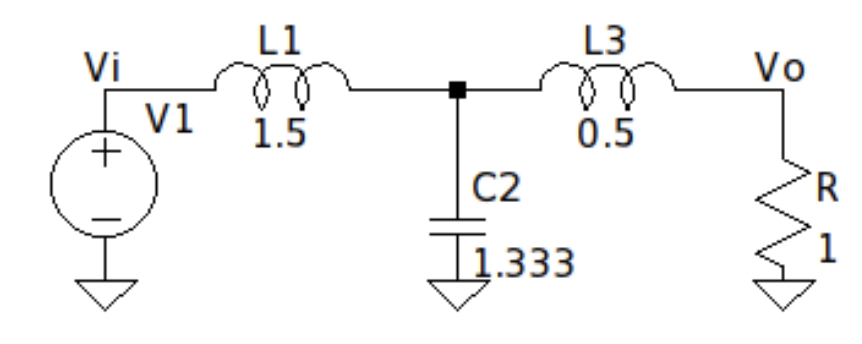

Análisis de cuadripolos:

1) Obtener la transferencia de tensión Vo/Vi por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C2 = 4/3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario. 


2) Valide la transferencia con simulación circuital.




Análisis matricial:

1) Construya la matriz de admitancia indefinida (MAI) del circuito.

2) Compute la transferencia de tensión con la MAI.

###### Resolución General:

Desarrollo Algebráico:

In [1]:
from IPython.display import IFrame
IFrame("./TS8V1.pdf", width=1000, height=500)

###### Resolución: Parte 1 - Análisis de Cuadripolos

2. Procedemos a simular el circuito con LTSpice.



Planteamos:

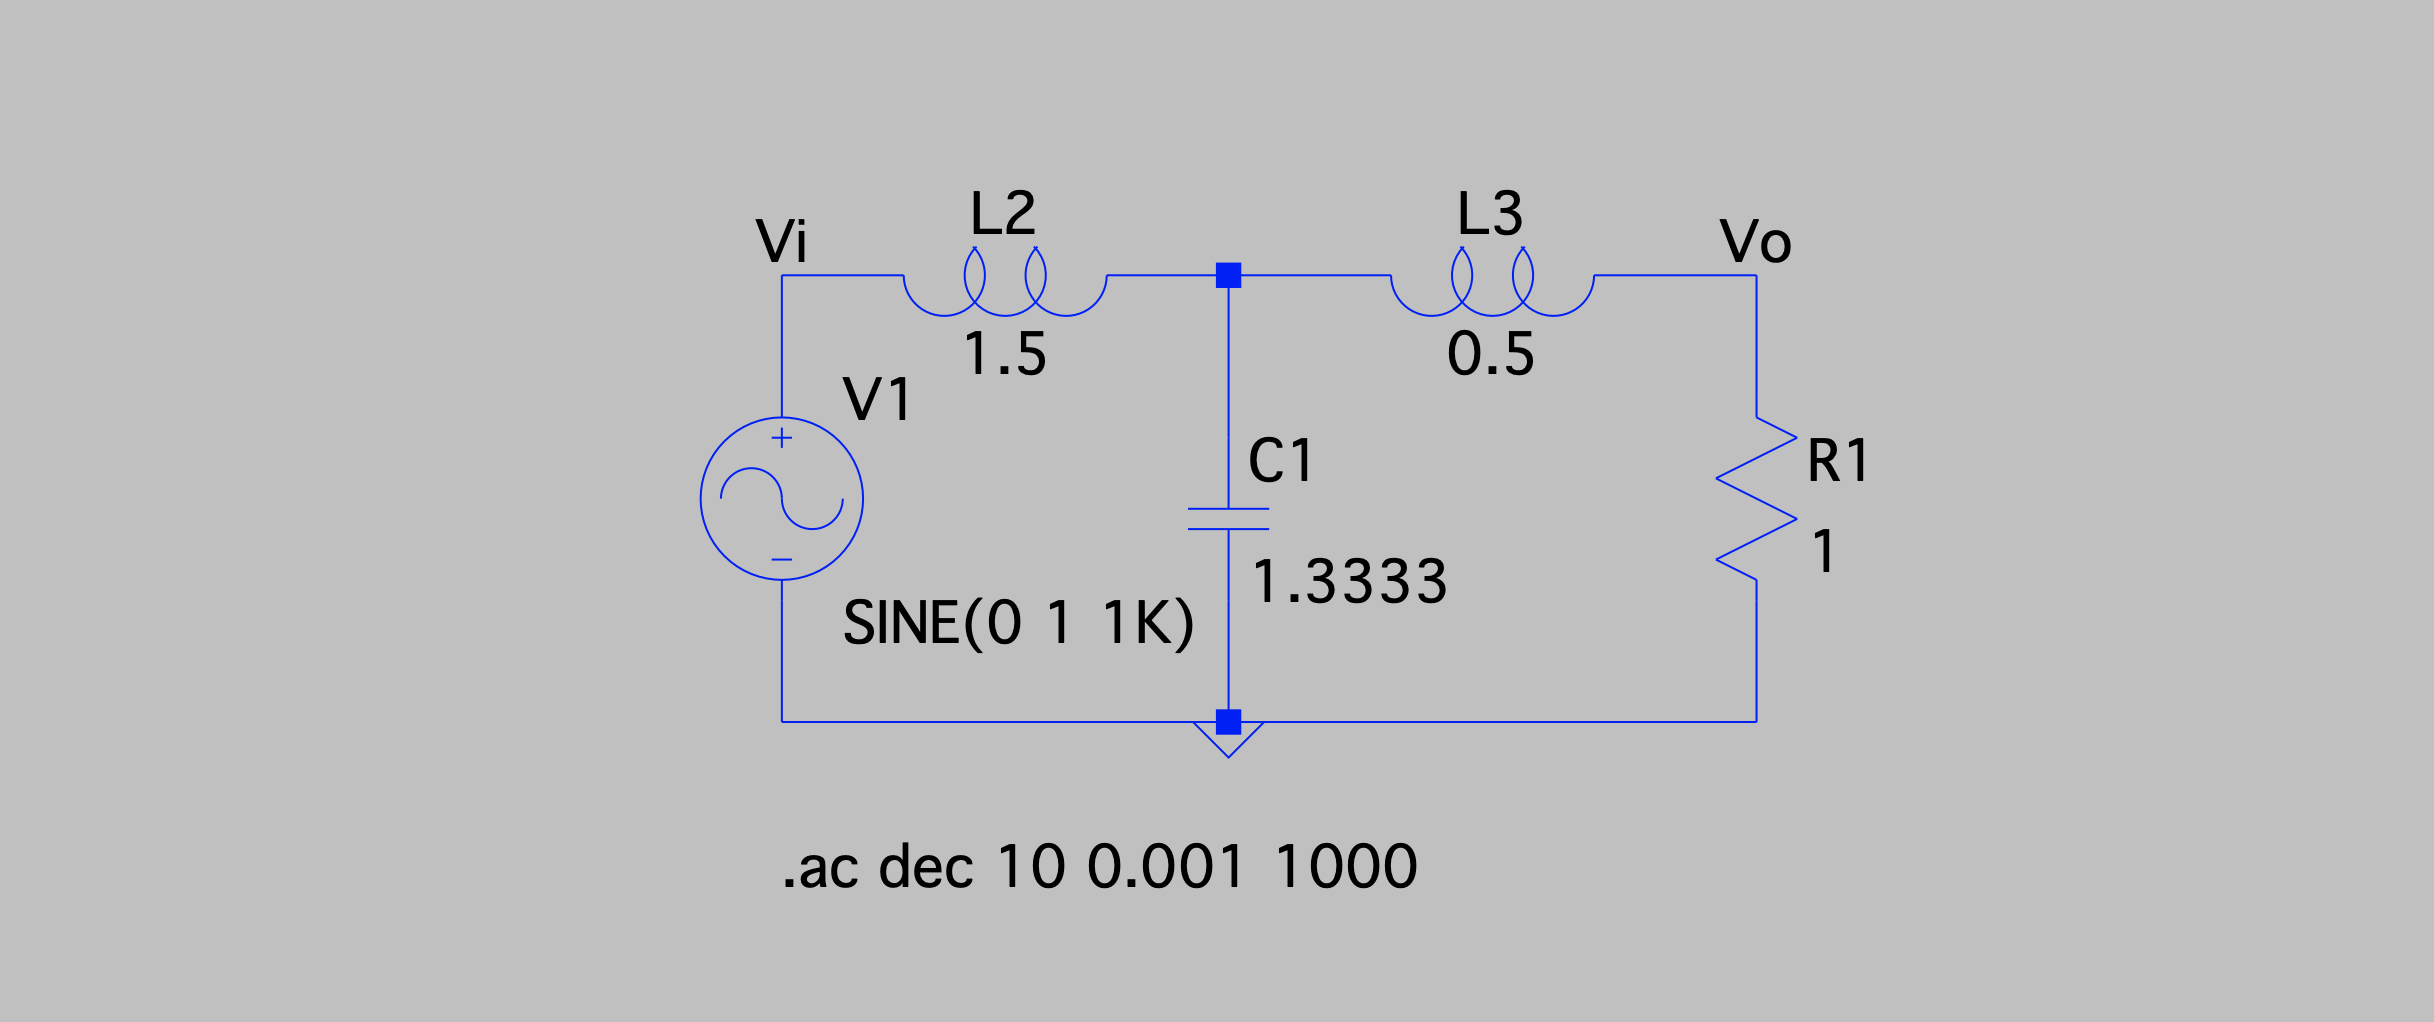

Y obtenemos la siguiente transferencia:

• Señal de salida: ${V_2 \over V_1} = f (f), en \; dB$

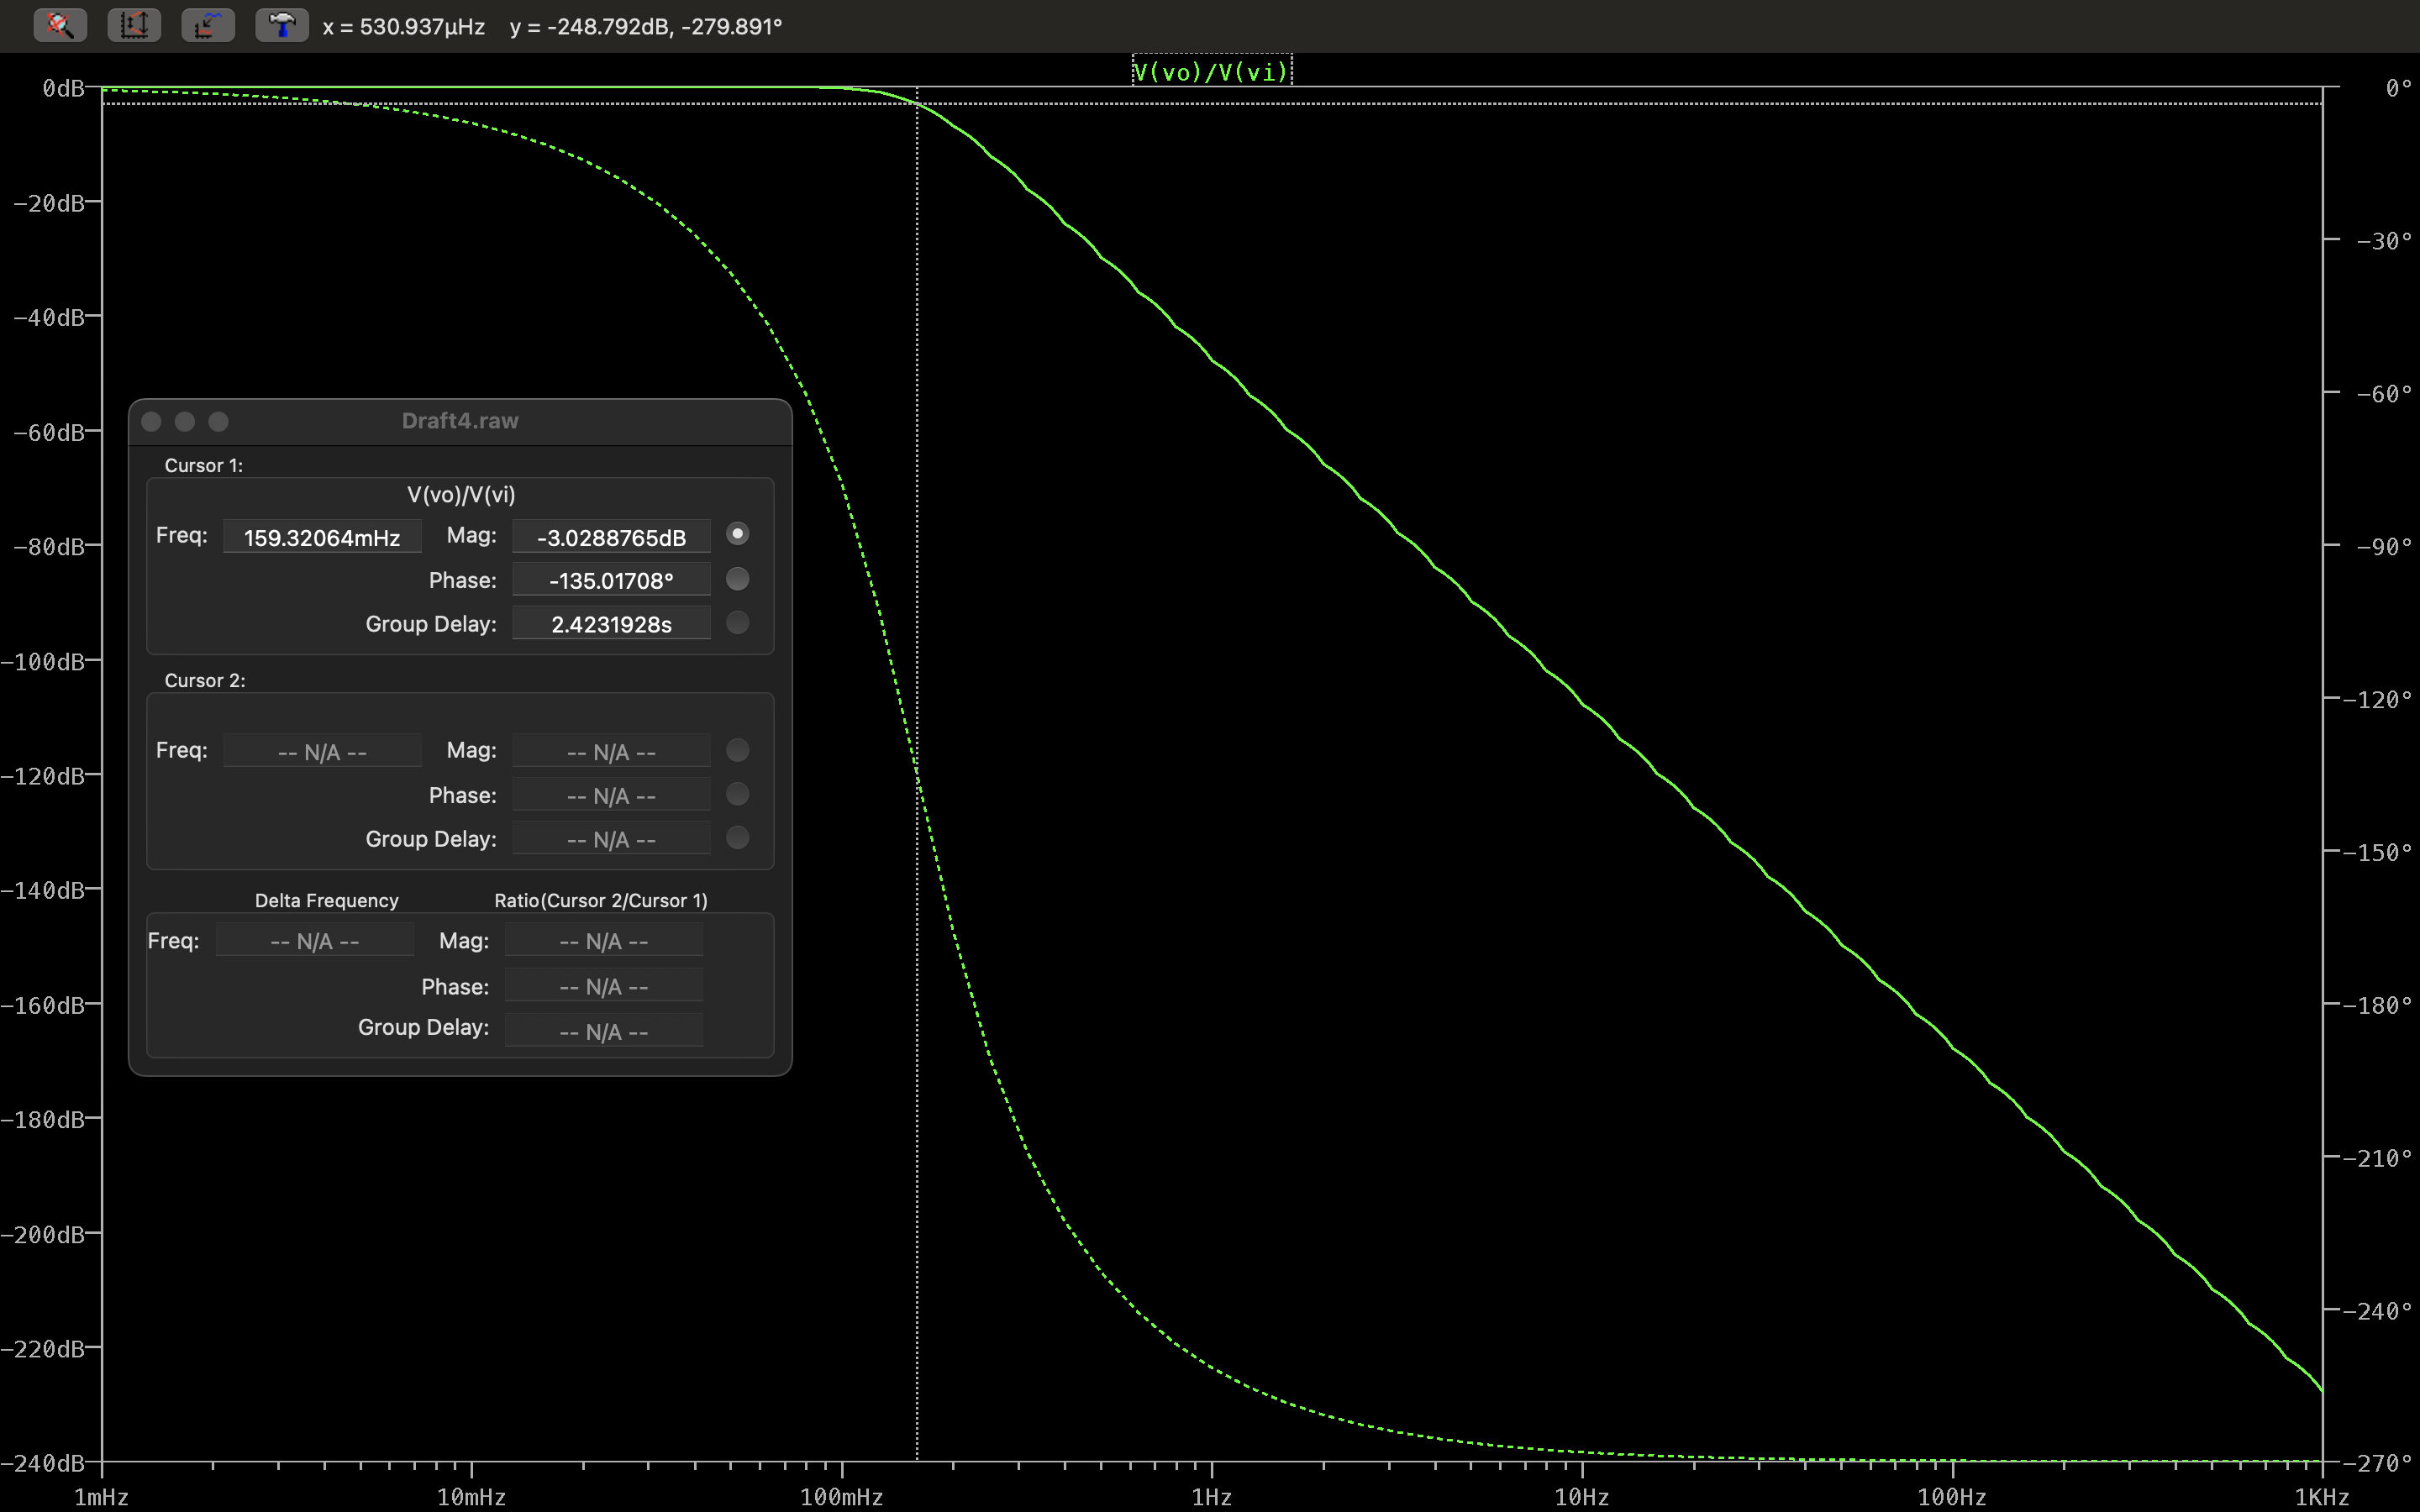

   Se verifica la transferencia de un pasa bajos de 3er orden con una Wp = 1 (160mHz x 2 $\pi$) normalizada.

###### Resolución: Parte 1 - Análisis Matricial

2. Simulamos la transferencia: módulo, fase, diagrama de polos y ceros y retardo de grupo:

/Users/giulianaruffa/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


<IPython.core.display.Math object>

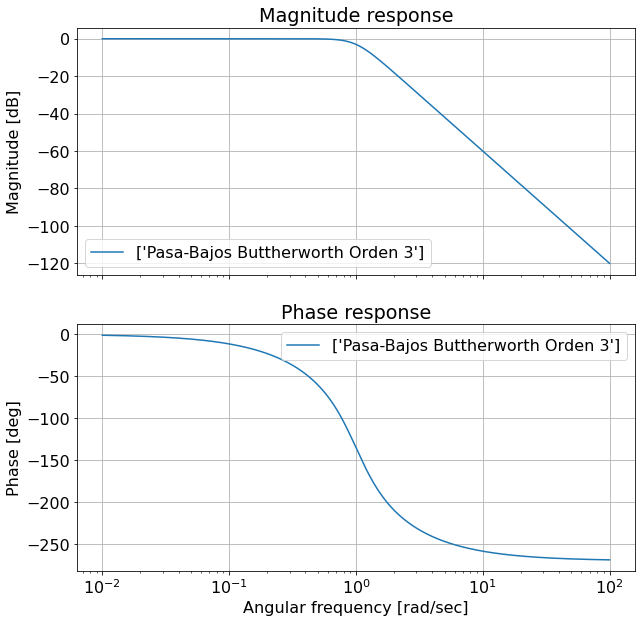

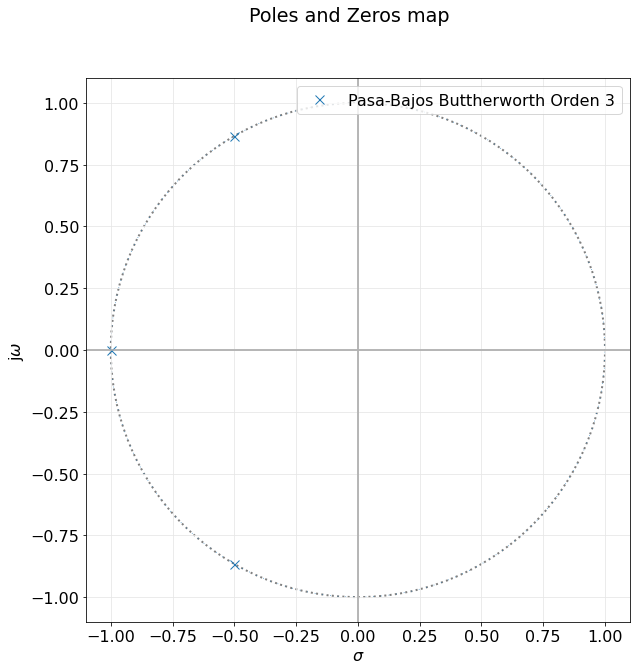

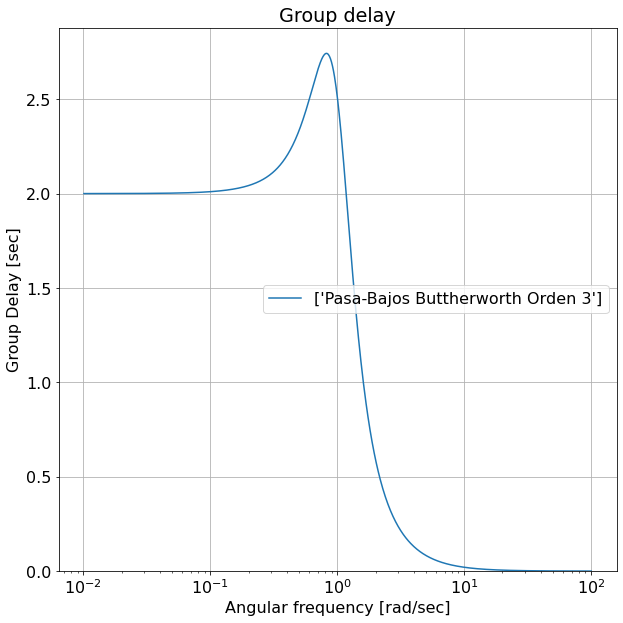

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})


# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti

num = np.array ([0, 0, 0, 1])
den = np.array ([1, 2, 2, 1])

rf = sig.TransferFunction(num,den)
pretty_print_lti(rf)

    
analyze_sys(rf, 'Pasa-Bajos Buttherworth Orden 3')



###### Parte II - Filtros Digitales

Ej2

In [2]:
from IPython.display import IFrame
IFrame("./TS8Ej2.pdf", width=1000, height=500)

A)

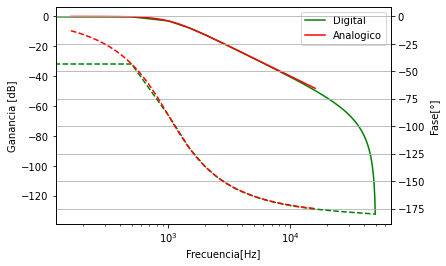

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


wc = 2*m.pi*1000 
Fs = 100000
num_a = [wc**2]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [wc**2, 2*wc**2, wc**2]
den =[4*Fs**2+wc*m.sqrt(2)*2*Fs+wc**2, -8*Fs**2+2*wc**2,  wc**2+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()

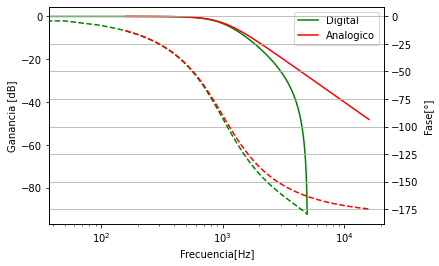

In [6]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


wc = 2*m.pi*1000 
Fs = 10000
num_a = [wc**2]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [wc**2, 2*wc**2, wc**2]
den =[4*Fs**2+wc*m.sqrt(2)*2*Fs+wc**2, -8*Fs**2+2*wc**2,  wc**2+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()

C)

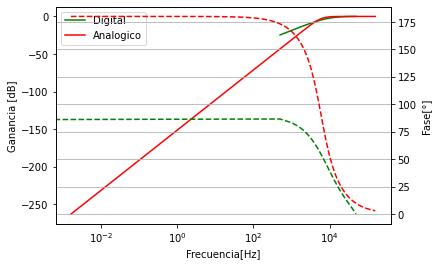

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 


wc = 2*m.pi*6000 
Fs = 100000
num_a = [1, 0, 0]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [4*Fs**2, -2*4*Fs**2, 4*Fs**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs, -8*Fs**2,  1+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()

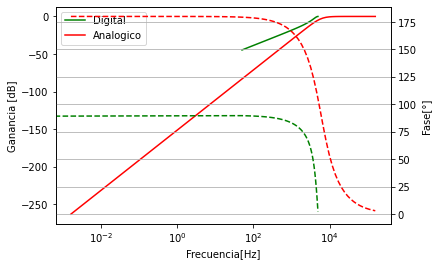

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as m
import splane as sp


np.seterr(divide = 'ignore') 


wc = 2*m.pi*6000 
Fs = 10000
num_a = [1, 0, 0]
den_a = [1, m.sqrt(2)*wc, wc**2]

num = [4*Fs**2, -2*4*Fs**2, 4*Fs**2]
den = [4*Fs**2+wc*m.sqrt(2)*2*Fs, -8*Fs**2,  1+Fs**2*4-2*m.sqrt(2)*Fs*wc]  


myDigitalFilter = signal.TransferFunction(num,den,dt=1/Fs)
myAnalogFilter = signal.TransferFunction(num_a, den_a)

w_analog, mag_analog,phase_analog = myAnalogFilter.bode()
w_digital, mag_digital,phase_digital = signal.dbode(myDigitalFilter)

fig, ax = plt.subplots()
ax.semilogx(w_digital/(2*m.pi), mag_digital, color='g', label='Digital')  # Magnitud digital
ax.semilogx(w_analog/(2*m.pi), mag_analog, color='r', label='Analogico')  # Magnitud analogica
ax.set_xlabel('Frecuencia[Hz]')
ax.set_ylabel('Ganancia [dB]')
plt.legend()
ax2 = ax.twinx()
ax2.semilogx(w_digital/(2*m.pi), phase_digital, color='g', label='Digital', linestyle='dashed')  # Fase digital
ax2.semilogx(w_analog/(2*m.pi), phase_analog, color='r', label='Analogico', linestyle='dashed')  # Fase analogica¿
ax2.set_ylabel('Fase[°]')
plt.grid()

In [ ]:
Ej2

In [ ]:
from IPython.display import IFrame
IFrame("./TS8Ej3.pdf", width=1000, height=500)